In [1]:
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

import psutil

from src.paths import TEST_IMAGE_FILEPATH
from src.processing import (
    process_images_sequential,
    process_images_parallel_pooled,
    process_images_parallel_conveyors,
)
from src.transformations import (
    convert_to_bw,
    apply_blur,
    apply_noise
)
from src.utils import (
    load_image,
    show_image,
    download_dataset_from_dropbox,
    run_testing
)

NUM_PHYSICAL_CORES = psutil.cpu_count(logical=False)
print("Number of Physical Cores:", NUM_PHYSICAL_CORES)

NUM_LOGICAL_CORES = psutil.cpu_count(logical=True)
print("Number of Logical Cores:", NUM_LOGICAL_CORES)

Number of Physical Cores: 8
Number of Logical Cores: 16


In [2]:
download_dataset_from_dropbox(
    url=r"https://www.dropbox.com/s/1eb7fx9bqr85cfo/data_set_VU_test1.zip?raw=1")

Dataset already exists


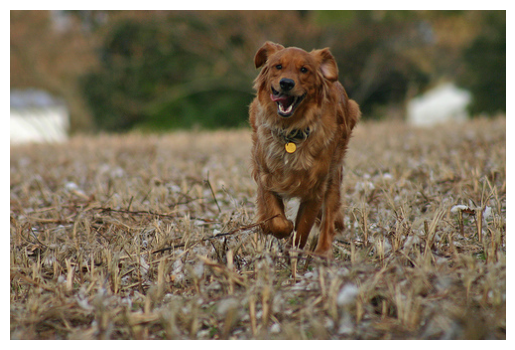

In [3]:
image = load_image(TEST_IMAGE_FILEPATH)
show_image(image)

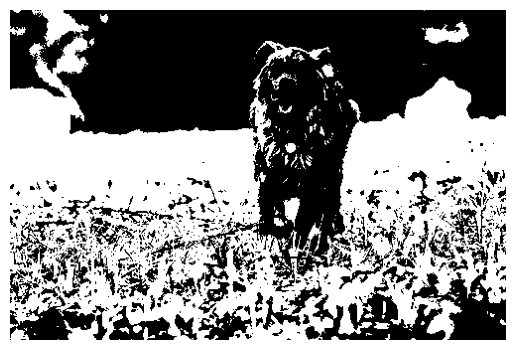

In [4]:
bw_image = convert_to_bw(image)
show_image(bw_image)

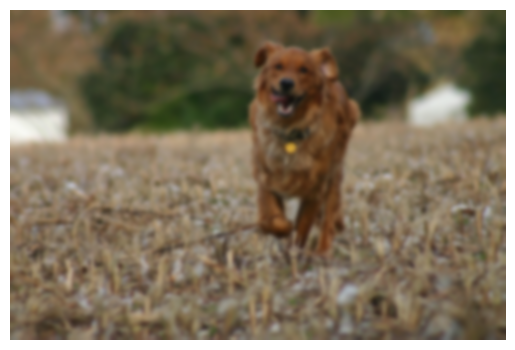

In [5]:
blurred_image = apply_blur(image, kernel_size=11)
show_image(blurred_image)

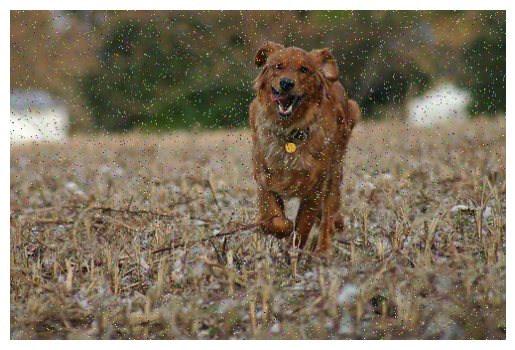

In [6]:
image_with_noise = apply_noise(image, noise_fraction=0.1)
show_image(image_with_noise)

In [7]:
process_images_sequential(transform=convert_to_bw)
process_images_sequential(transform=apply_blur)
process_images_sequential(transform=apply_noise);

Function process_images_sequential with args ['convert_to_bw'] took 36.9830 seconds
Function process_images_sequential with args ['apply_blur'] took 40.9329 seconds
Function process_images_sequential with args ['apply_noise'] took 73.5605 seconds


Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'convert_to_bw'] took 18.2829 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'convert_to_bw'] took 9.9357 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'convert_to_bw'] took 5.8111 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'convert_to_bw'] took 4.6911 seconds


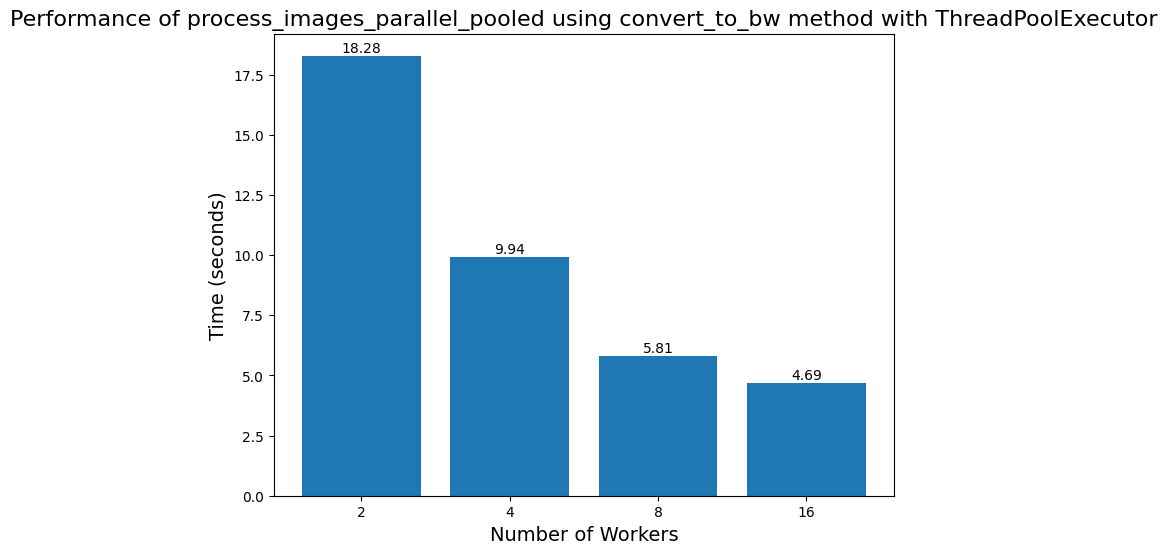

Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_blur'] took 23.9386 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_blur'] took 12.7568 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_blur'] took 7.9787 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_blur'] took 5.3038 seconds


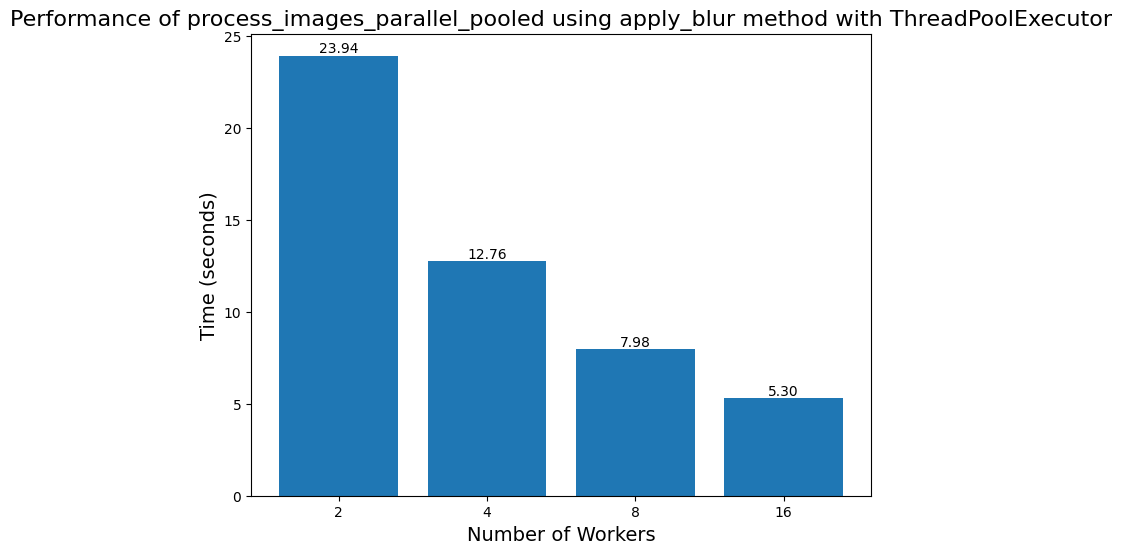

Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_noise'] took 43.9517 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_noise'] took 28.6602 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_noise'] took 27.5749 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_noise'] took 28.4040 seconds


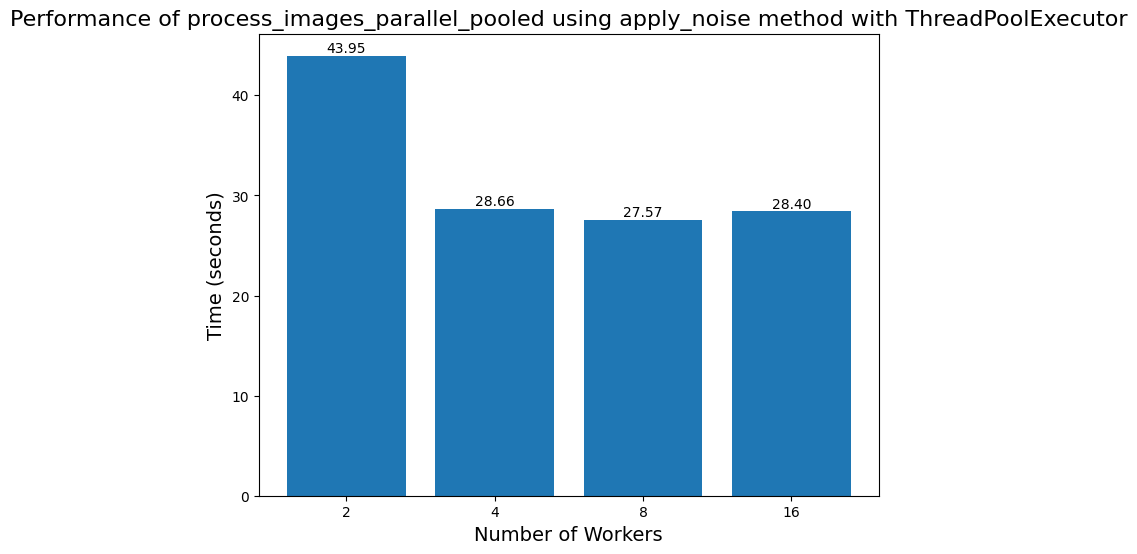

In [8]:
run_testing(
    function=process_images_parallel_pooled,
    pool_executor=ThreadPoolExecutor,
    transform=convert_to_bw,
    max_workers=NUM_LOGICAL_CORES
)
run_testing(
    function=process_images_parallel_pooled,
    pool_executor=ThreadPoolExecutor,
    transform=apply_blur,
    max_workers=NUM_LOGICAL_CORES
)
run_testing(
    function=process_images_parallel_pooled,
    pool_executor=ThreadPoolExecutor,
    transform=apply_noise,
    max_workers=NUM_LOGICAL_CORES
)

Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'convert_to_bw'] took 20.7020 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'convert_to_bw'] took 12.0244 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'convert_to_bw'] took 8.5748 seconds


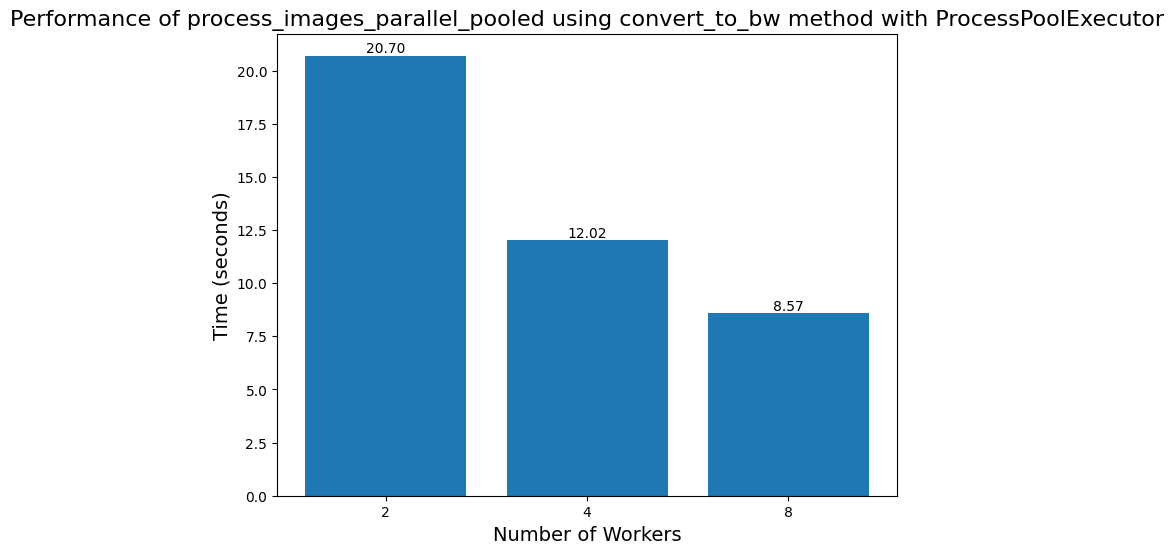

Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'apply_blur'] took 25.0850 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'apply_blur'] took 16.3168 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'apply_blur'] took 11.6936 seconds


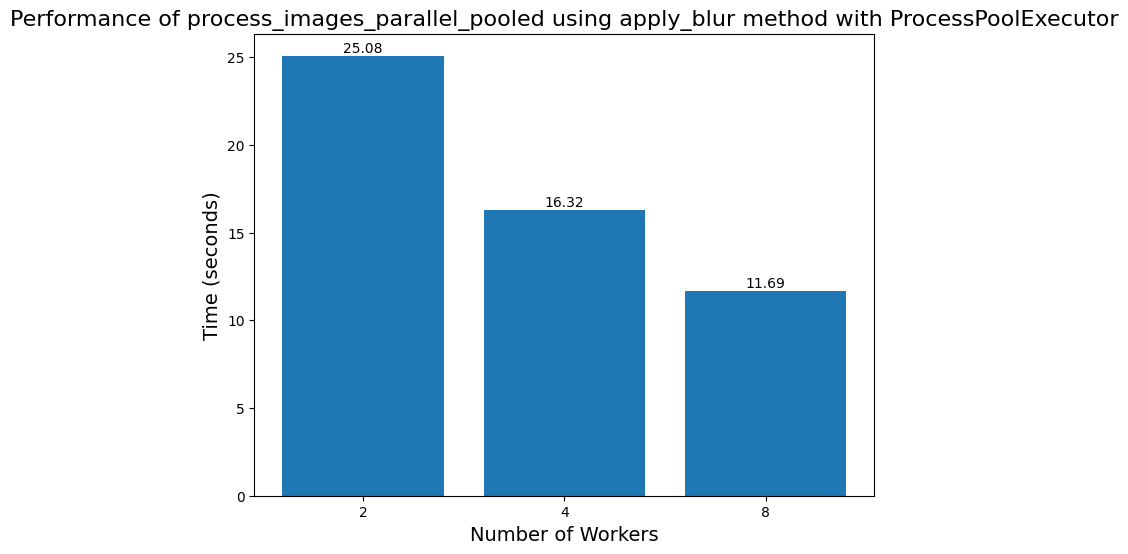

Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'apply_noise'] took 40.8960 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'apply_noise'] took 22.8593 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'apply_noise'] took 14.1801 seconds


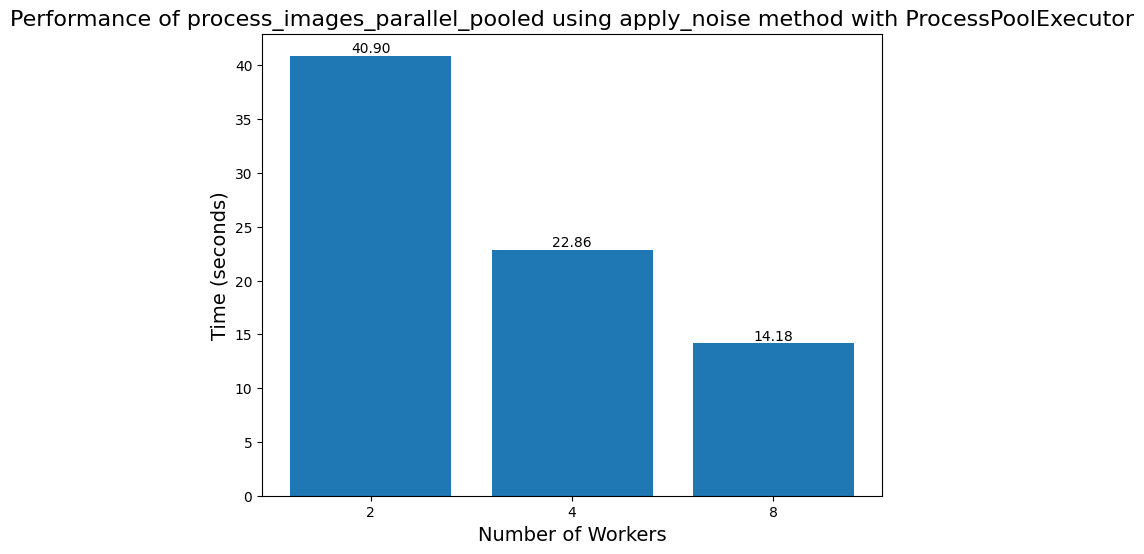

In [9]:
run_testing(
    function=process_images_parallel_pooled,
    pool_executor=ProcessPoolExecutor,
    transform=convert_to_bw,
    max_workers=NUM_PHYSICAL_CORES
)
run_testing(
    function=process_images_parallel_pooled,
    pool_executor=ProcessPoolExecutor,
    transform=apply_blur,
    max_workers=NUM_PHYSICAL_CORES
)
run_testing(
    function=process_images_parallel_pooled,
    pool_executor=ProcessPoolExecutor,
    transform=apply_noise,
    max_workers=NUM_PHYSICAL_CORES
)

Function process_images_parallel_conveyors with args ['convert_to_bw'] took 11.3619 seconds
Function process_images_parallel_conveyors with args ['convert_to_bw'] took 8.5285 seconds
Function process_images_parallel_conveyors with args ['convert_to_bw'] took 6.7507 seconds


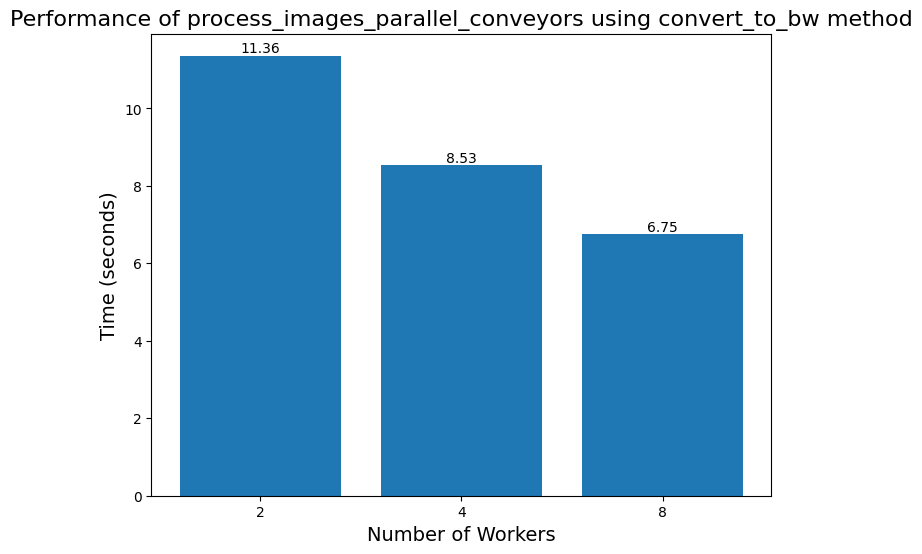

Function process_images_parallel_conveyors with args ['apply_blur'] took 14.5336 seconds
Function process_images_parallel_conveyors with args ['apply_blur'] took 10.7656 seconds
Function process_images_parallel_conveyors with args ['apply_blur'] took 8.5931 seconds


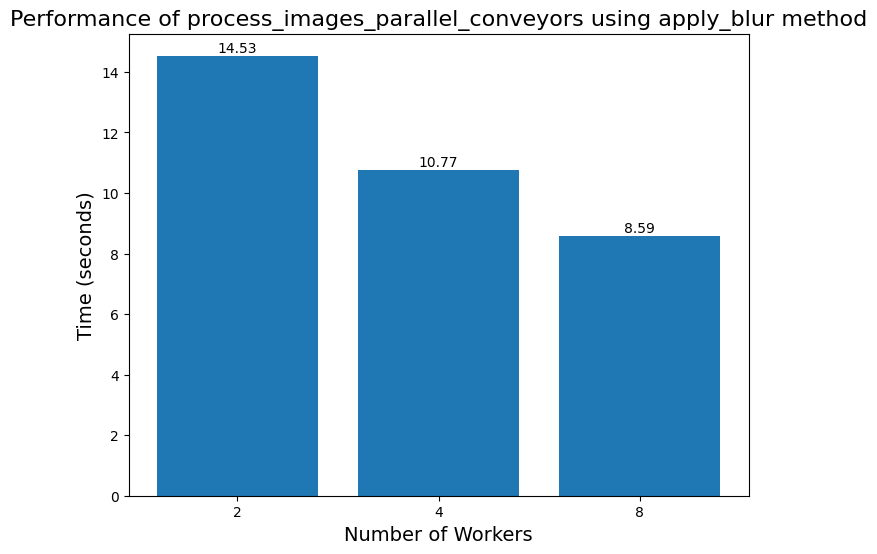

Function process_images_parallel_conveyors with args ['apply_noise'] took 18.4133 seconds
Function process_images_parallel_conveyors with args ['apply_noise'] took 13.2914 seconds
Function process_images_parallel_conveyors with args ['apply_noise'] took 11.3460 seconds


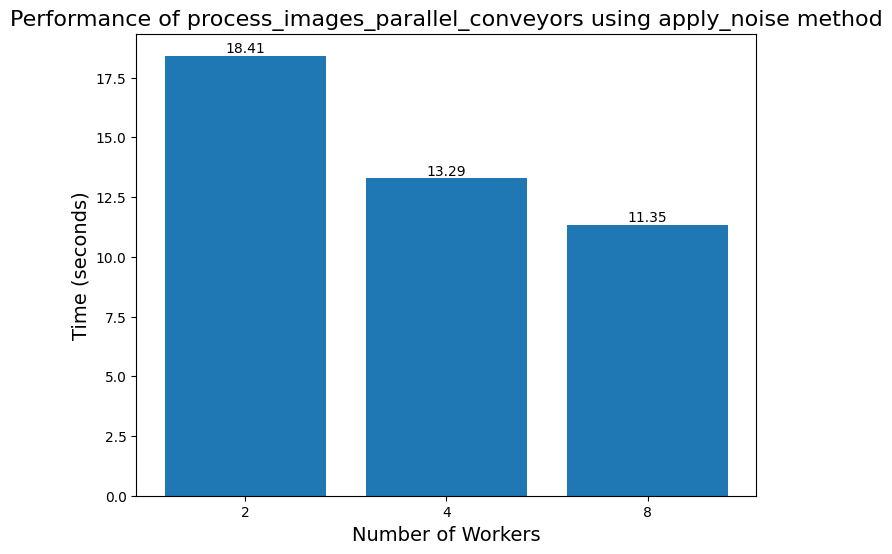

In [10]:
run_testing(
    function=process_images_parallel_conveyors,
    transform=convert_to_bw,
    max_workers=NUM_PHYSICAL_CORES
)
run_testing(
    function=process_images_parallel_conveyors,
    transform=apply_blur,
    max_workers=NUM_PHYSICAL_CORES
)
run_testing(
    function=process_images_parallel_conveyors,
    transform=apply_noise,
    max_workers=NUM_PHYSICAL_CORES
)